In [1]:
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
import networkx as nx

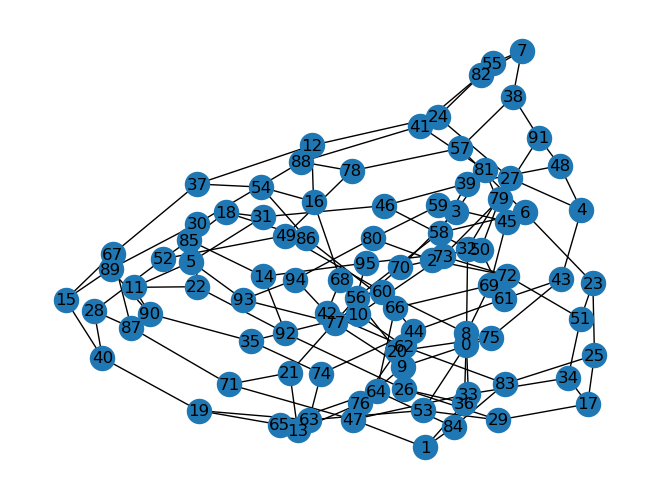

In [2]:
qubits = 96
graph = nx.random_regular_graph(3, qubits, seed=722)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h, mixer_h = qaoa.maxcut(graph)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-72.0) [I72]
+ (0.5) [Z72 Z73]
+ (0.5) [Z72 Z51]
+ (0.5) [Z72 Z2]
+ (0.5) [Z73 Z10]
+ (0.5) [Z73 Z79]
+ (0.5) [Z21 Z71]
+ (0.5) [Z21 Z13]
+ (0.5) [Z21 Z56]
+ (0.5) [Z71 Z47]
+ (0.5) [Z71 Z87]
+ (0.5) [Z32 Z46]
+ (0.5) [Z32 Z0]
+ (0.5) [Z32 Z27]
+ (0.5) [Z46 Z39]
+ (0.5) [Z46 Z31]
+ (0.5) [Z50 Z61]
+ (0.5) [Z50 Z95]
+ (0.5) [Z50 Z79]
+ (0.5) [Z61 Z43]
+ (0.5) [Z61 Z44]
+ (0.5) [Z47 Z33]
+ (0.5) [Z47 Z1]
+ (0.5) [Z54 Z86]
+ (0.5) [Z54 Z37]
+ (0.5) [Z54 Z16]
+ (0.5) [Z86 Z66]
+ (0.5) [Z86 Z18]
+ (0.5) [Z23 Z25]
+ (0.5) [Z23 Z51]
+ (0.5) [Z23 Z6]
+ (0.5) [Z25 Z17]
+ (0.5) [Z25 Z83]
+ (0.5) [Z66 Z69]
+ (0.5) [Z66 Z64]
+ (0.5) [Z69 Z45]
+ (0.5) [Z69 Z8]
+ (0.5) [Z14 Z95]
+ (0.5) [Z14 Z92]
+ (0.5) [Z14 Z85]
+ (0.5) [Z95 Z56]
+ (0.5) [Z6 Z57]
+ (0.5) [Z6 Z58]
+ (0.5) [Z57 Z38]
+ (0.5) [Z57 Z78]
+ (0.5) [Z41 Z88]
+ (0.5) [Z41 Z81]
+ (0.5) [Z41 Z82]
+ (0.5) [Z88 Z78]
+ (0.5) [Z88 Z30]
+ (0.5) [Z4 Z48]
+ (0.5) [Z4 Z43]
+ (0.5) [Z4 Z27]
+ (0.5) [Z48 Z39]
+ (0.5) [Z48 Z91]
+ (0.

In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(qubits)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [6]:
dev = qml.device("qiskit.aer", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

ValueError: Backend 'aer_simulator' supports maximum 30 wires

In [ ]:
params = np.array([[0.5] * depth, [0.5] * depth], requires_grad=True)

In [ ]:
cost_function(params)

array(-13.25488281)

In [ ]:
QuantumCircuit.count_ops(dev._circuit)

OrderedDict([('cx', 144), ('h', 120), ('rz', 120), ('measure', 24)])

In [ ]:
# print the number of total gates

print("Total number of gates: ", sum(QuantumCircuit.count_ops(dev._circuit).values()))

Total number of gates:  408


In [ ]:
# print the number of two qubit gates, i.e. cx gates + rz gates

print("Number of two qubit gates: ", QuantumCircuit.count_ops(dev._circuit)['cx'] + QuantumCircuit.count_ops(dev._circuit)['rz'])

Number of two qubit gates:  264


In [ ]:
dev._circuit.qasm(formatted=True, filename="./raw_qasm/qaoa_n{}_from_python.qasm".format(qubits))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[24];
creg c[24];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
h q[20];
h q[21];
h q[22];
h q[23];
cx q[21],q[15];
rz(0.5) q[15];
cx q[21],q[15];
cx q[14],q[15];
rz(0.5) q[15];
cx q[14],q[15];
cx q[18],q[15];
rz(0.5) q[15];
cx q[18],q[15];
cx q[8],q[21];
rz(0.5) q[21];
cx q[8],q[21];
cx q[13],q[21];
rz(0.5) q[21];
cx q[13],q[21];
cx q[18],q[6];
rz(0.5) q[6];
cx q[18],q[6];
cx q[19],q[6];
rz(0.5) q[6];
cx q[19],q[6];
cx q[9],q[6];
rz(0.5) q[6];
cx q[9],q[6];
cx q[5],q[18];
rz(0.5) q[18];
cx q[5],q[18];
cx q[20],q[7];
rz(0.5) q[7];
cx q[20],q[7];
cx q[16],q[7];
rz(0.5) q[7];
cx q[16],q[7];
cx q[4],q[7];
rz(0.5) q[7];
cx q[4],q[7];
cx q[1],q[20];
rz(0.5) q[20];
cx q[1],q[20];
cx q[12],q[20];
rz(0.5) q[20];
cx q[12],q[20];
cx q[16],q[3];
rz(0.5) q[3];
cx q[16],q[3];
cx q[14],q[3];
rz(0.5) q[3];
cx q[14],q[3];
cx q[2],q[3];
rz